In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pickle

In [5]:
df=pd.read_csv("sample3.csv")
df


,SaleUnits,TargetUnits,AchSale,LMSU,LMSV
0,98.0,59.5056,165,22.0,7524.44
1,126.0,93.6002,135,75.0,30958.50
2,1201.0,1265.8417,95,717.0,270065.22
3,3.0,3.5322,85,0.0,0.00
4,17.0,23.7607,72,10.0,4953.40
...,...,...,...,...,...
70910,0.0,7.4772,0,6.0,951.24
70911,937.0,1477.6457,63,1024.0,455987.20
70912,4026.0,7865.1444,51,4830.0,1936781.70
70913,9162.0,10271.2926,89,9188.0,3684296.12


In [6]:
df.columns = df.columns.str.strip()
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="median")
si.fit(df[['SaleUnits','TargetUnits','AchSale']])
df[['SaleUnits','TargetUnits','AchSale']]=si.transform(df[['SaleUnits','TargetUnits','AchSale']])

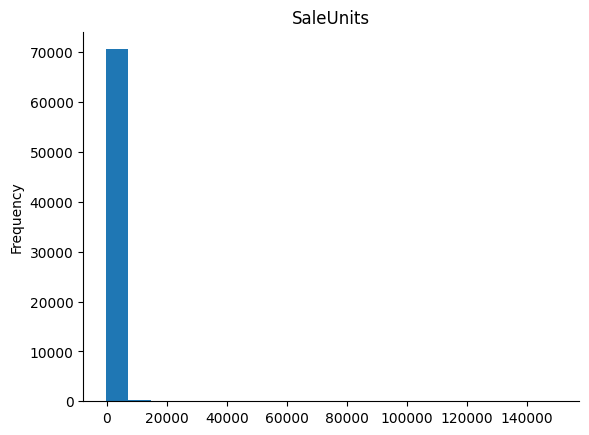

In [7]:
# @title SaleUnits

from matplotlib import pyplot as plt
df['SaleUnits'].plot(kind='hist', bins=20, title='SaleUnits')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
X = df[['SaleUnits','TargetUnits']]
y = df['AchSale']
# Convert relevant columns to numeric type
df['SaleUnits'] = pd.to_numeric(df['SaleUnits'], errors='coerce')
df['TargetUnits'] = pd.to_numeric(df['TargetUnits'], errors='coerce')
df['AchSale'] = pd.to_numeric(df['AchSale'], errors='coerce')

# Handle potential missing values introduced by conversion
df.dropna(subset=['SaleUnits', 'TargetUnits', 'AchSale'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)





reg= linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [10]:

print(len(X_test))
estimated= (reg.predict(X_test-1))
estimate=estimated
print(estimated)


14183
[115.248796   117.35478308 114.18592864 ... 110.4591342  166.52255522
 115.99181366]


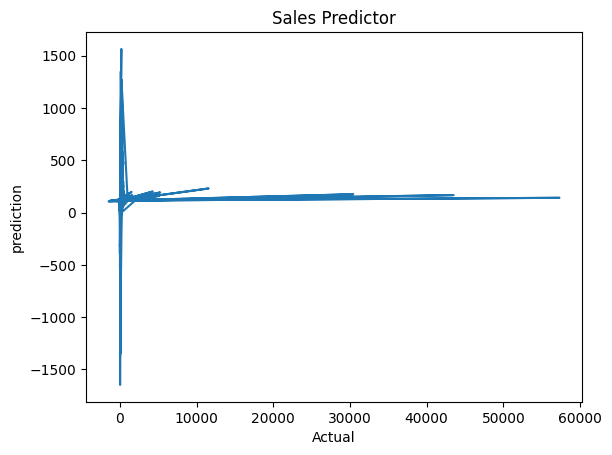

In [11]:
#plt.scatter(y_test, estimated[:-1])
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Sales Predictor')
plt.plot(y_test,estimated)
plt.show()

In [12]:
pickle.dump(reg,open('AI_model.pkl','wb'))

In [15]:
model = pickle.load(open('AI_model.pkl','rb')) # read your file by read binary format

print(reg.predict([[20,40]]))

[112.49922271]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# Define the MASE function
def mase(y_test, estimated, y_train):
    n = y_train.shape[0]
    d = np.abs(np.diff(y_train, axis=0)).sum() / (n - 1)
    errors = np.abs(y_test - estimated)
    return errors.mean() / d

# Calculate MASE
mase_value = mase(y_test, estimated, y_train)
print("MASE:", mase_value)


MASE: 0.5791190898385871


In [17]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
mase_scores = []

X_array = X


def mase(y_test, estimated, y_train):
    n = y_train.shape[0]
    d = np.abs(np.diff(y_train, axis=0)).sum() / (n - 1)
    errors = np.abs(y_test - estimated)
    return errors.mean() / d


for train_index, test_index in kfold.split(X_array):
    x_train, x_test = X_array.iloc[train_index], X_array.iloc[test_index]
    y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values

    reg.fit(x_train,y_train)
    estimated= (reg.predict(x_test))

    mse = mean_squared_error(y_test, estimated)
    mse_scores.append(mse)

    mase_value = mase(y_test, estimated, y_train)
    mase_scores.append(mase_value)

print("Mean MSE:", np.mean(mse_scores))
print("Mean MASE:", np.mean(mase_scores))


Mean MSE: 1490849.0635096836
Mean MASE: 0.7345602420294886


In [20]:
from flask import Flask, render_template,jsonify

In [21]:
app= Flask(__name__)
model=pickle.load(open('AI_model.pkl','rb'))
@app.route('/')
def home():
     return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
  int_features=[np.array(int_feature)] #convert data into array

  prediction= model.predict(final_feature)
  output= round(prediction[0],2)

  return render_template('index.html',prediction_text='time={}'.format(output))

  if _name_ == '_main_':
    app.run(debug = True)

In [ ]:
!pip install sweetviz
import sweetviz as sv

# Create and display the report
report = sv.analyze(df)
report2=sv.analyze(df,'AchSale',estimated)
report.show_html('sweetviz_report.html')



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 66.8 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

AttributeError: 'numpy.ndarray' object has no attribute 'skip'

In [ ]:
!pip install sweetviz
import sweetviz as sv

#Analyze the dataframe
report = sv.analyze(df)
report.show_html('sweetviz_report.html')

# Assuming 'df' contains the actual 'AchSale' column and 'estimated' is from cross-validation,
# create a new DataFrame for comparison using only the subset of data with predictions
df_predicted = df.iloc[:len(estimated)].copy()  # Select the first 'len(estimated)' rows
df_predicted['AchSale'] = estimated  # Replace actual sales with predicted sales in this subset

# Compare the two DataFrames (using the subset for actual sales as well)
comparison_report = sv.compare([df.iloc[:len(estimated)], "Actual Sales"], [df_predicted, "Predicted Sales"])
comparison_report.show_html('comparison_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



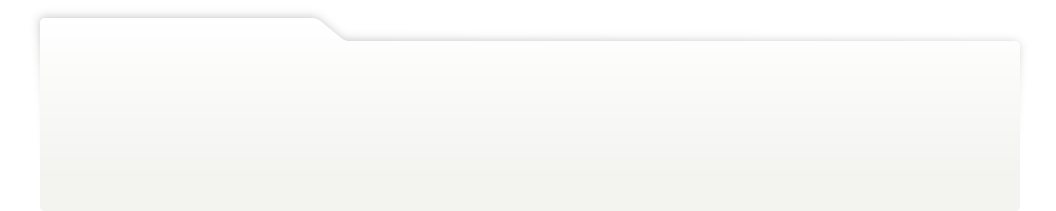
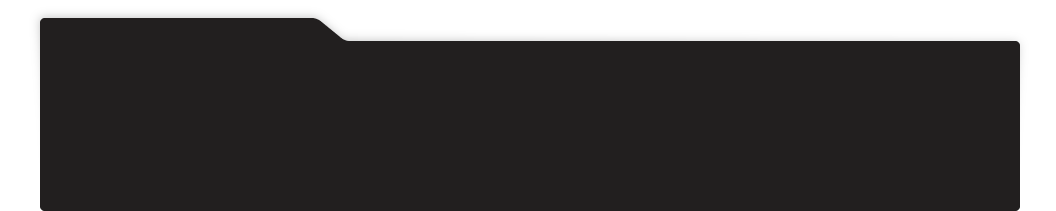
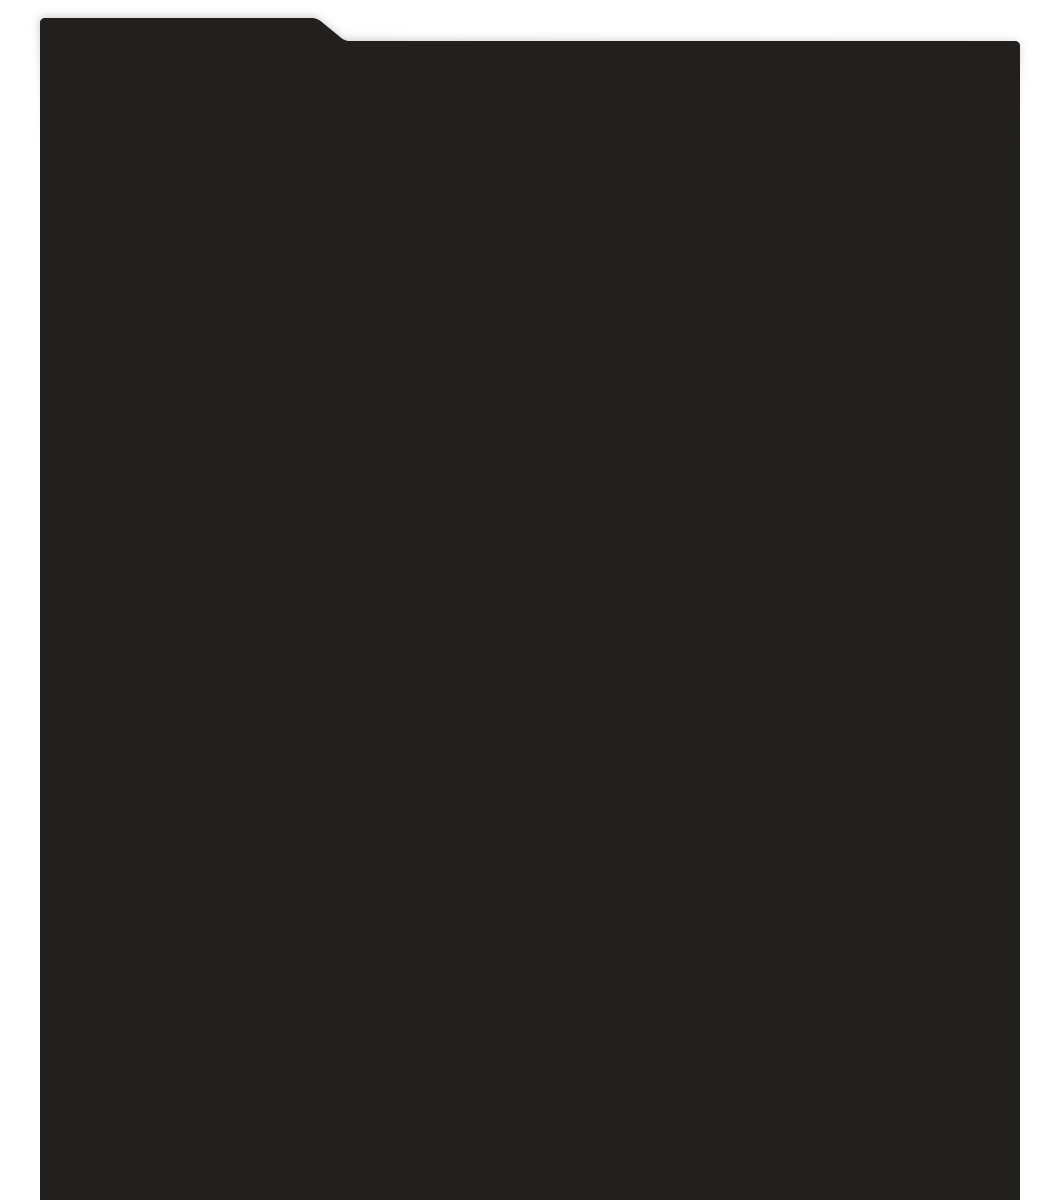
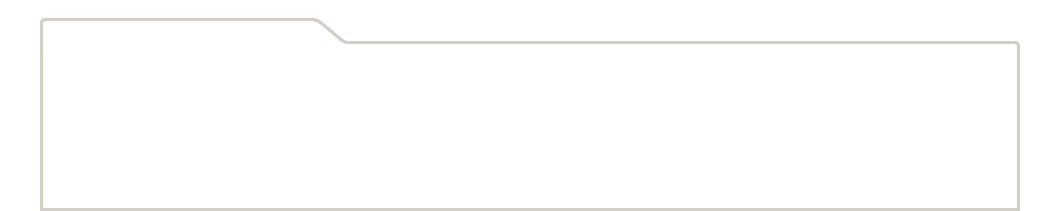
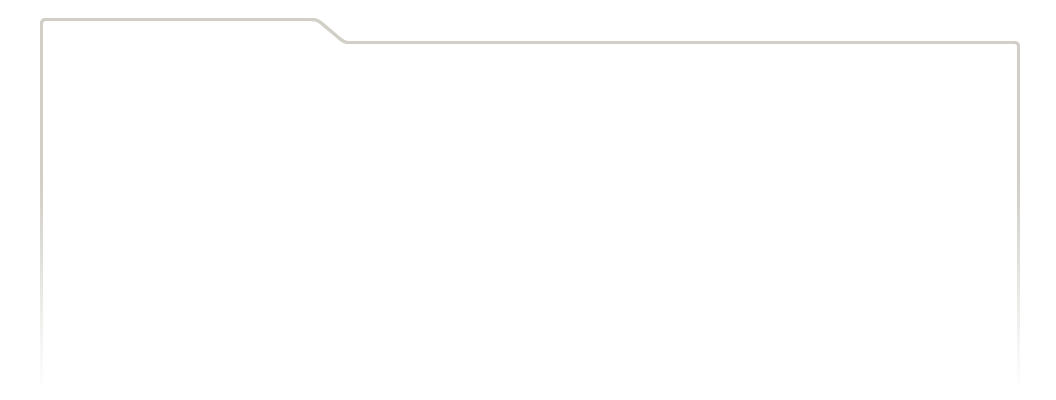
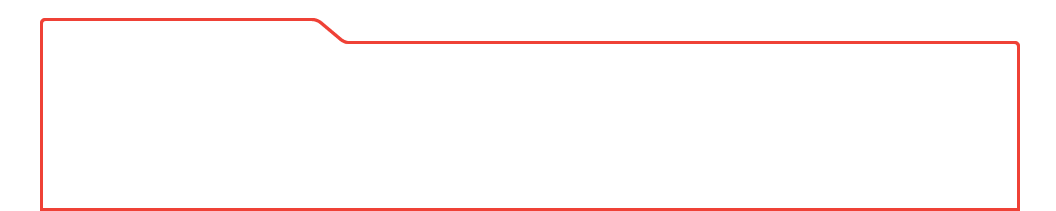
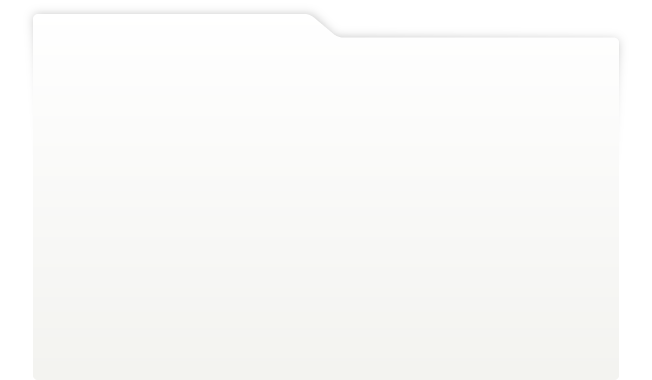
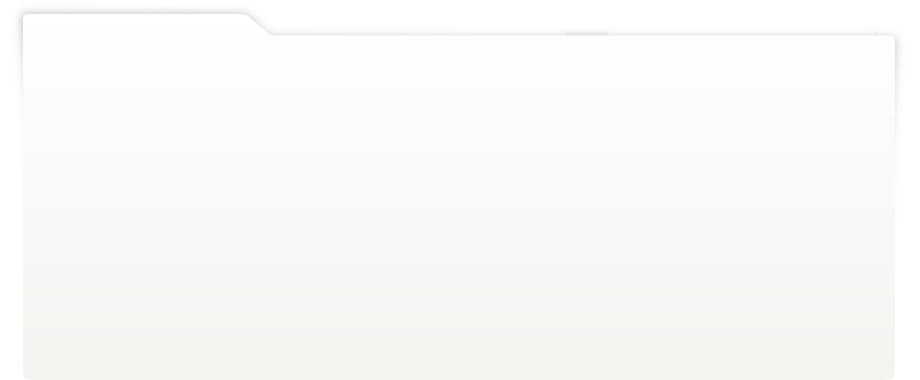
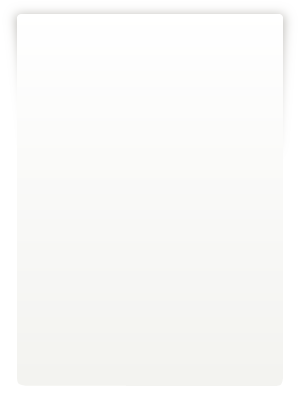
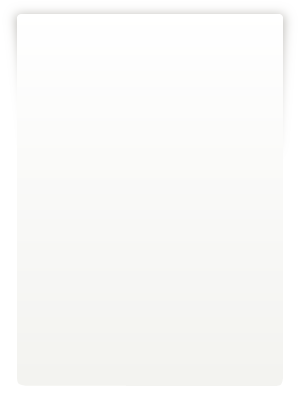
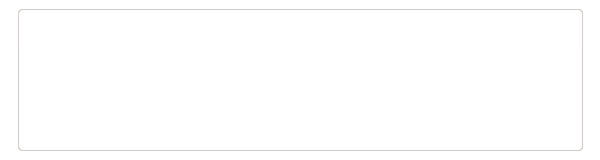
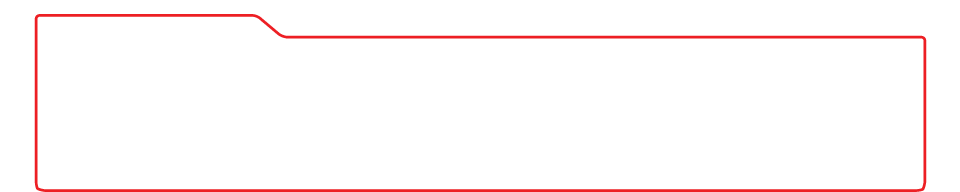
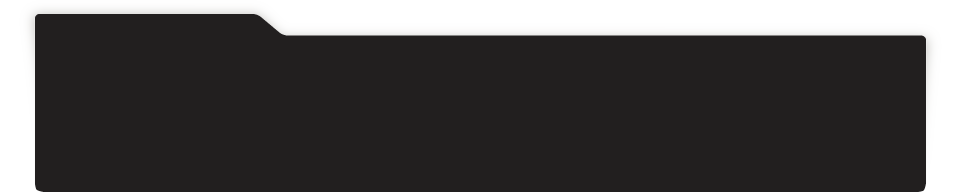
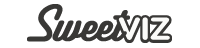
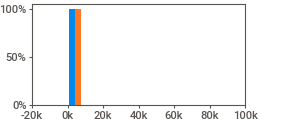
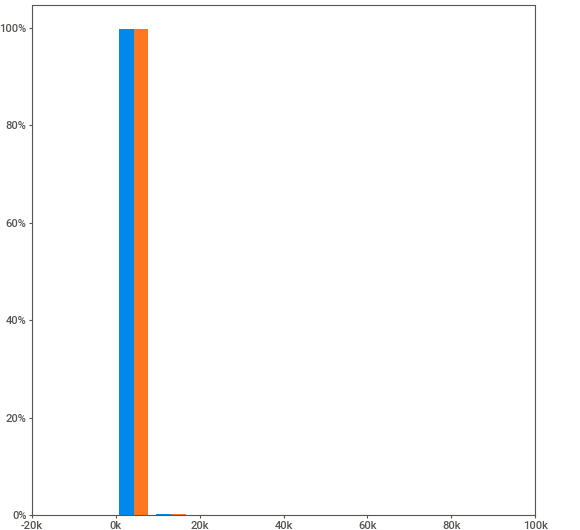
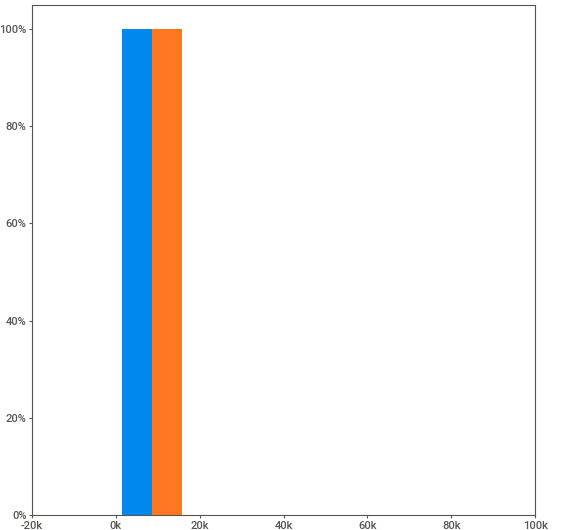
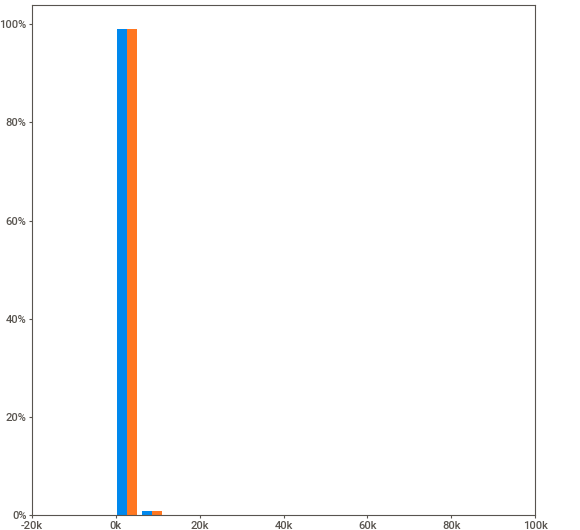
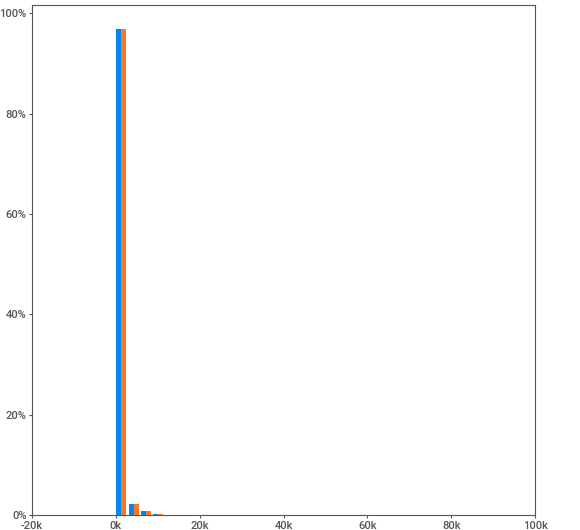
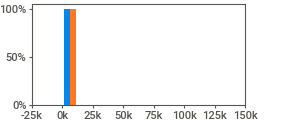
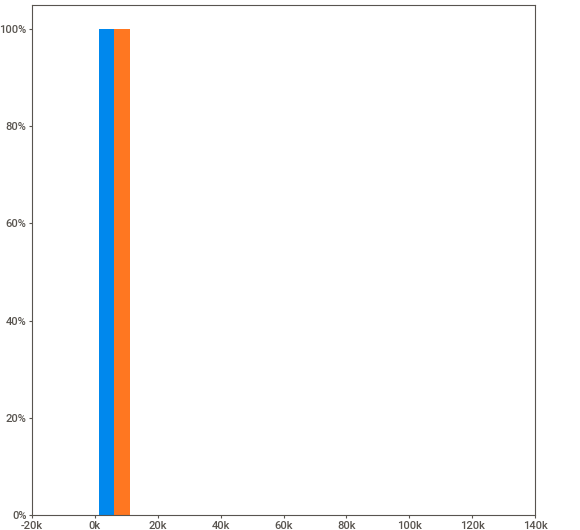
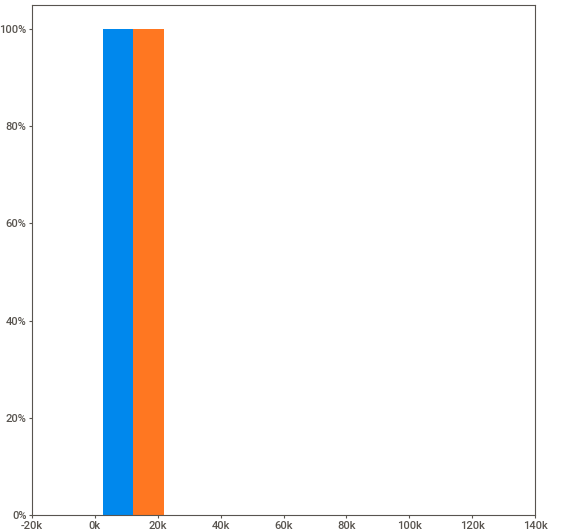
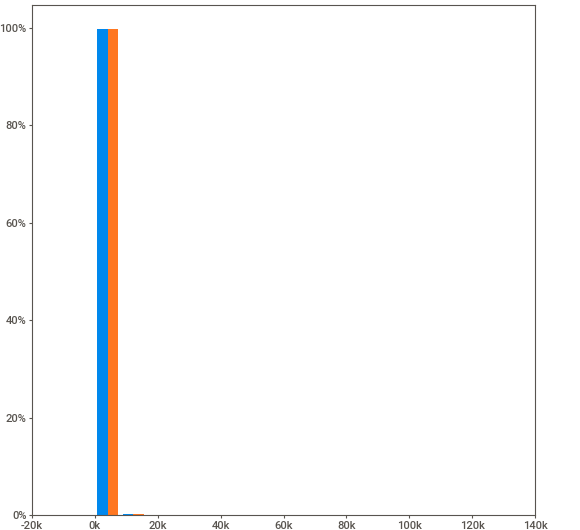
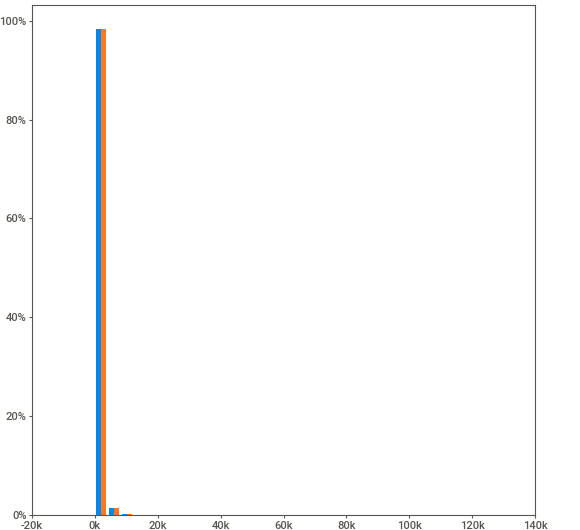
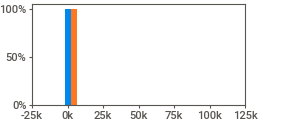
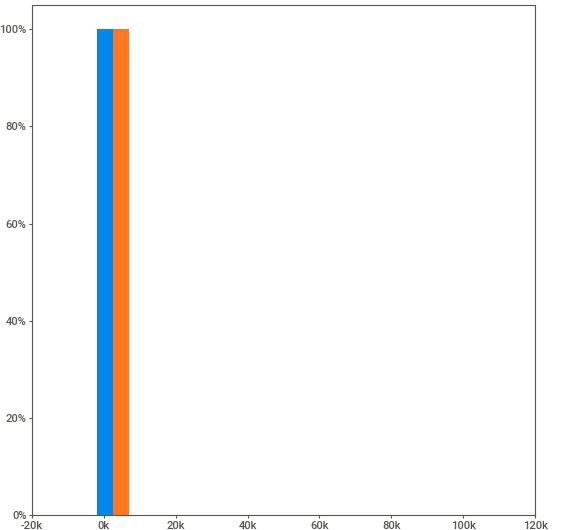
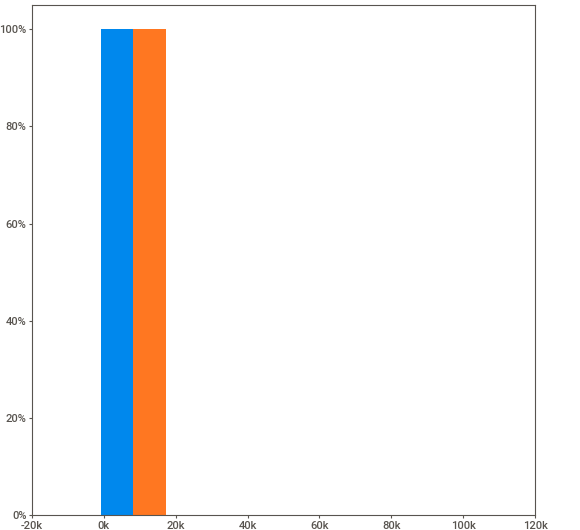
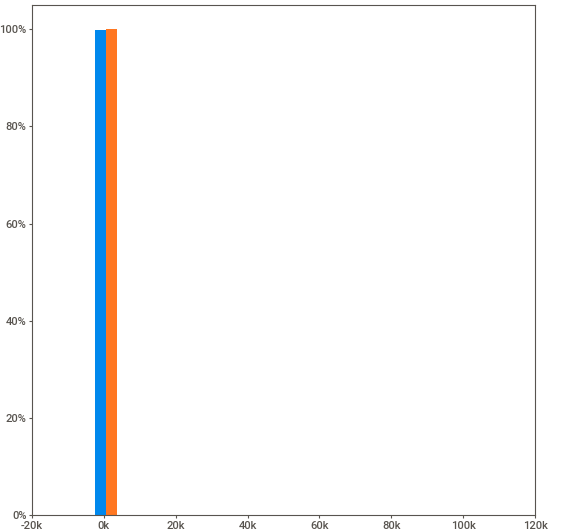
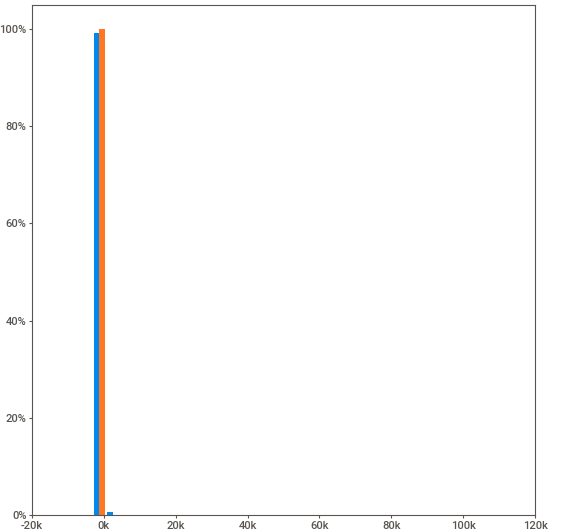
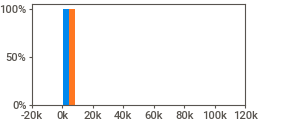
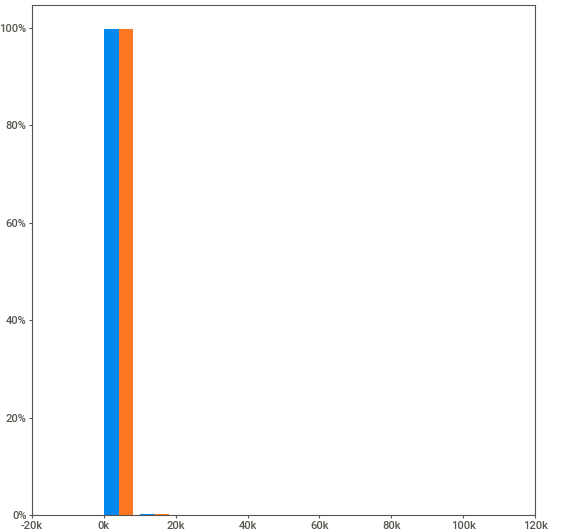
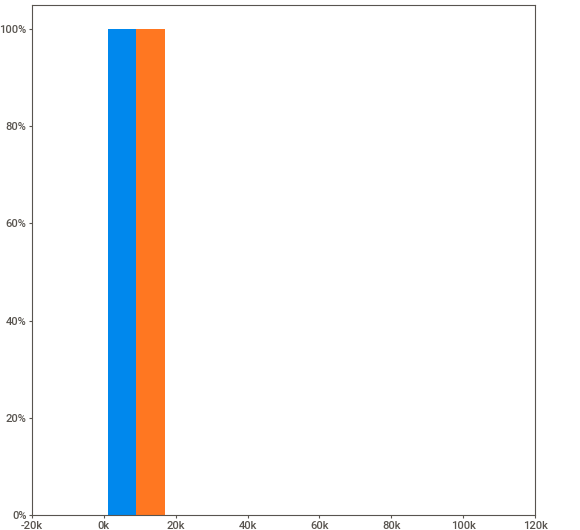
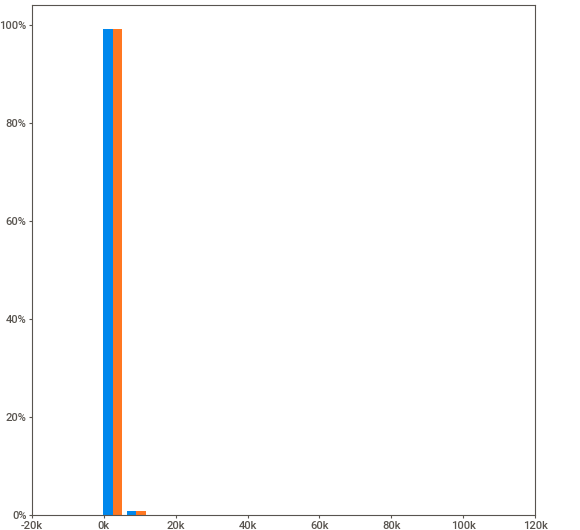
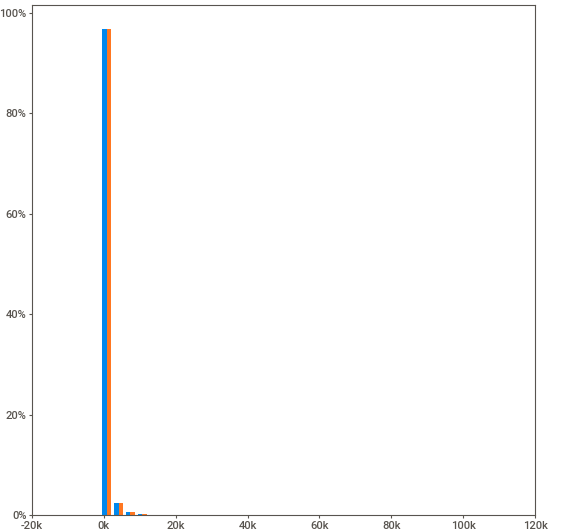
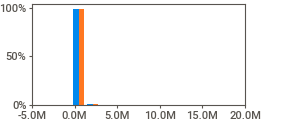
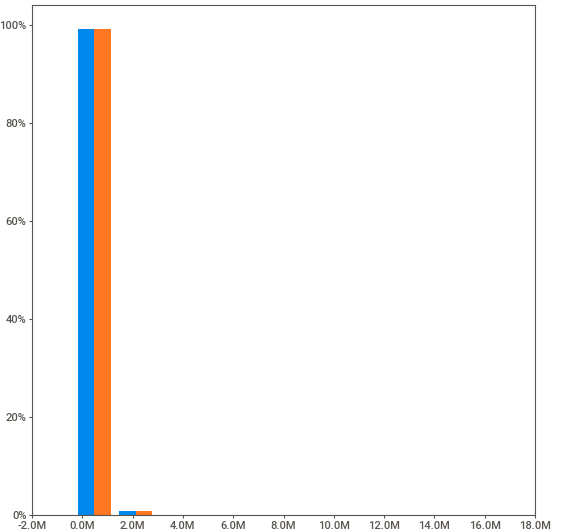
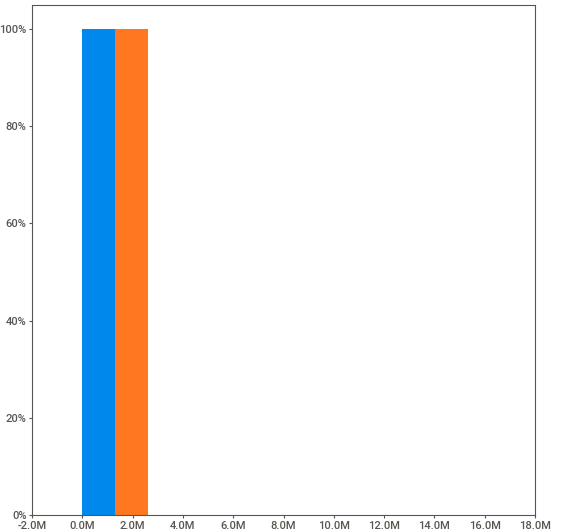
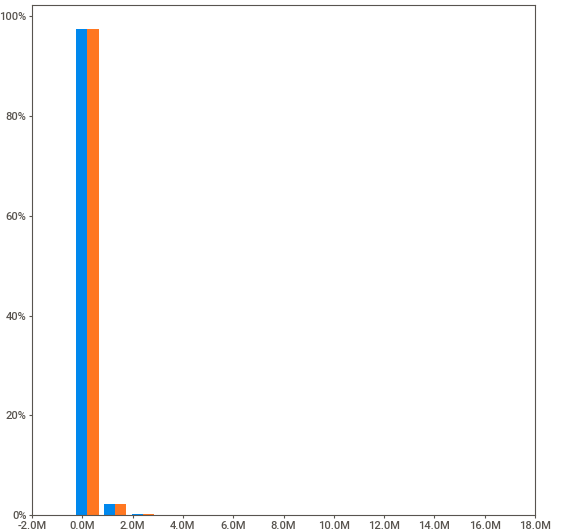
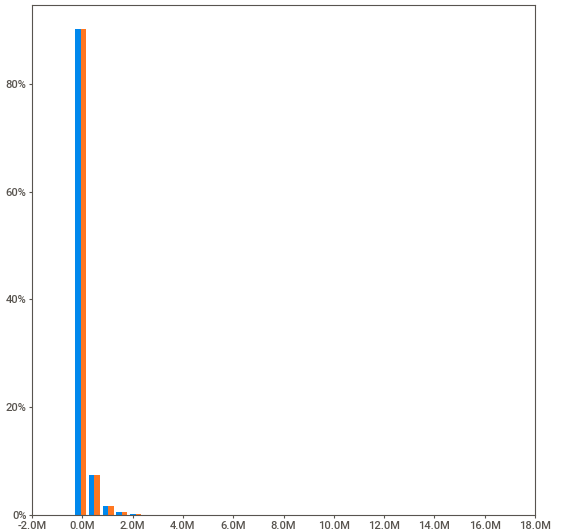
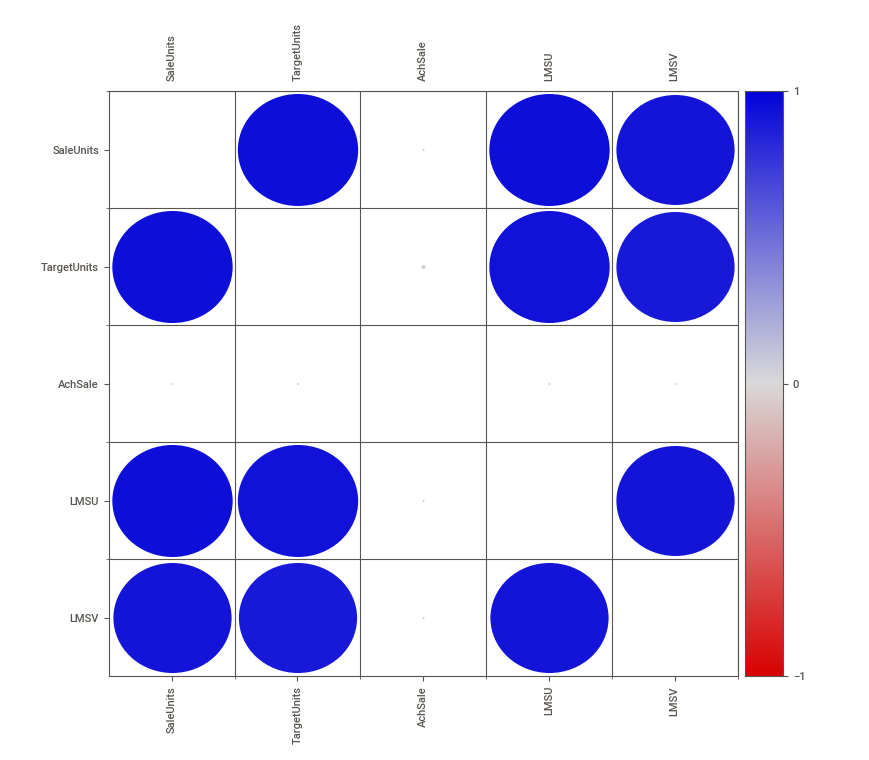
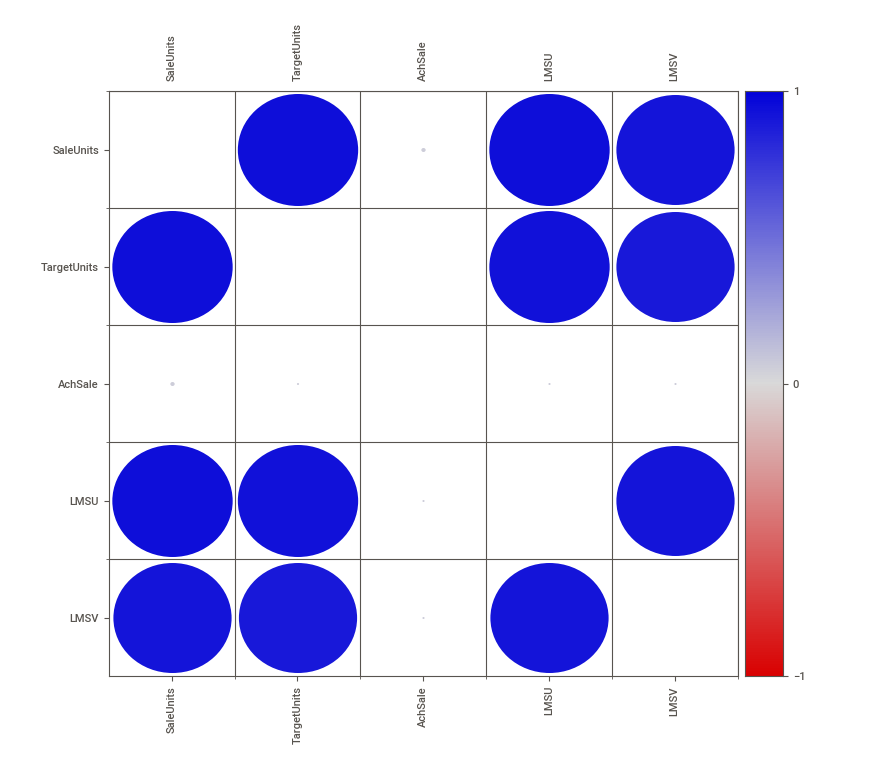

In [ ]:
from IPython.display import display, HTML

# Display the report
display(HTML('comparison_report.html'))
